Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD1417_REAL01_U.pkl...
Visualizing quantization for right hand, joint 7


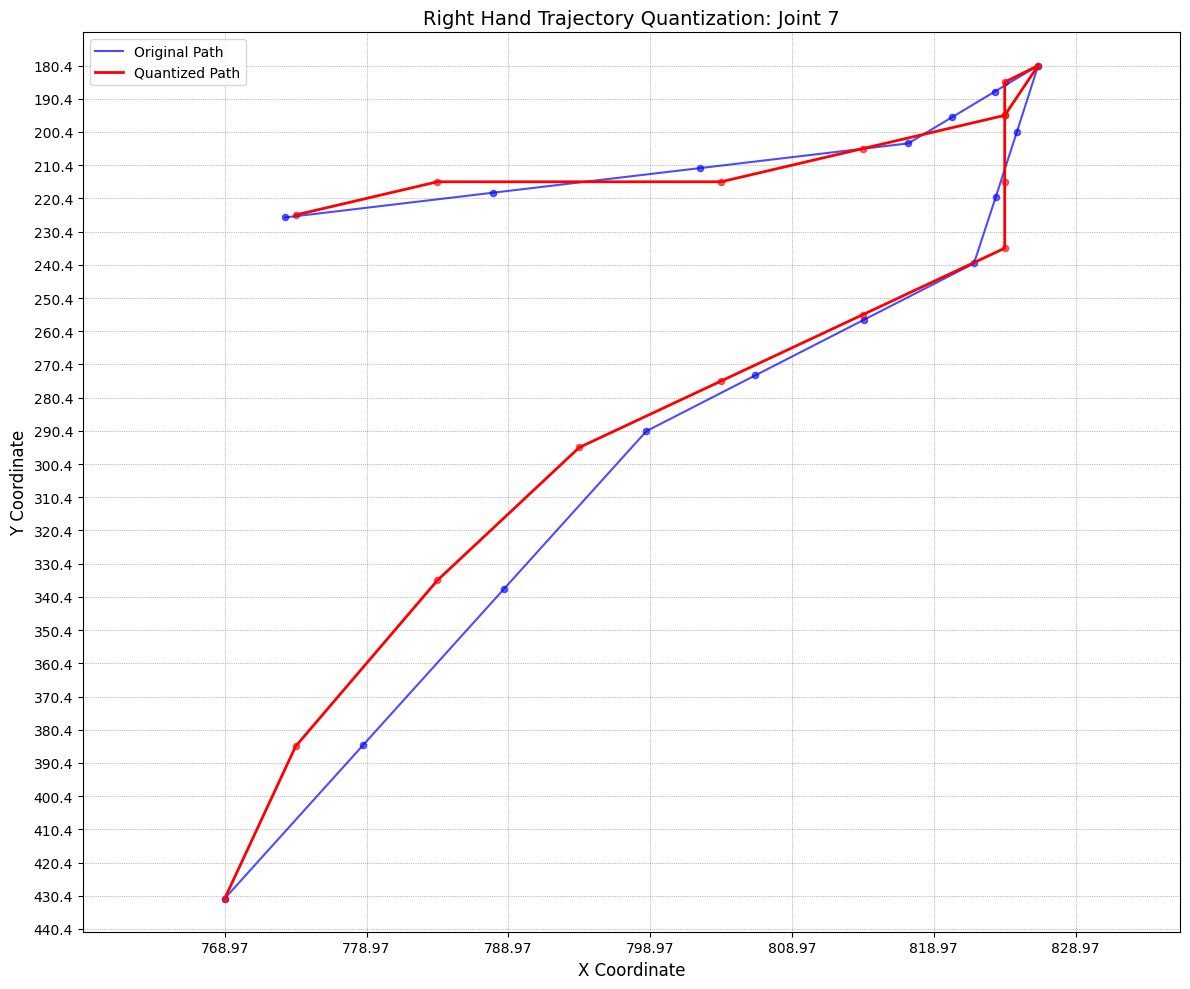

Visualizing quantization for left hand, joint 8


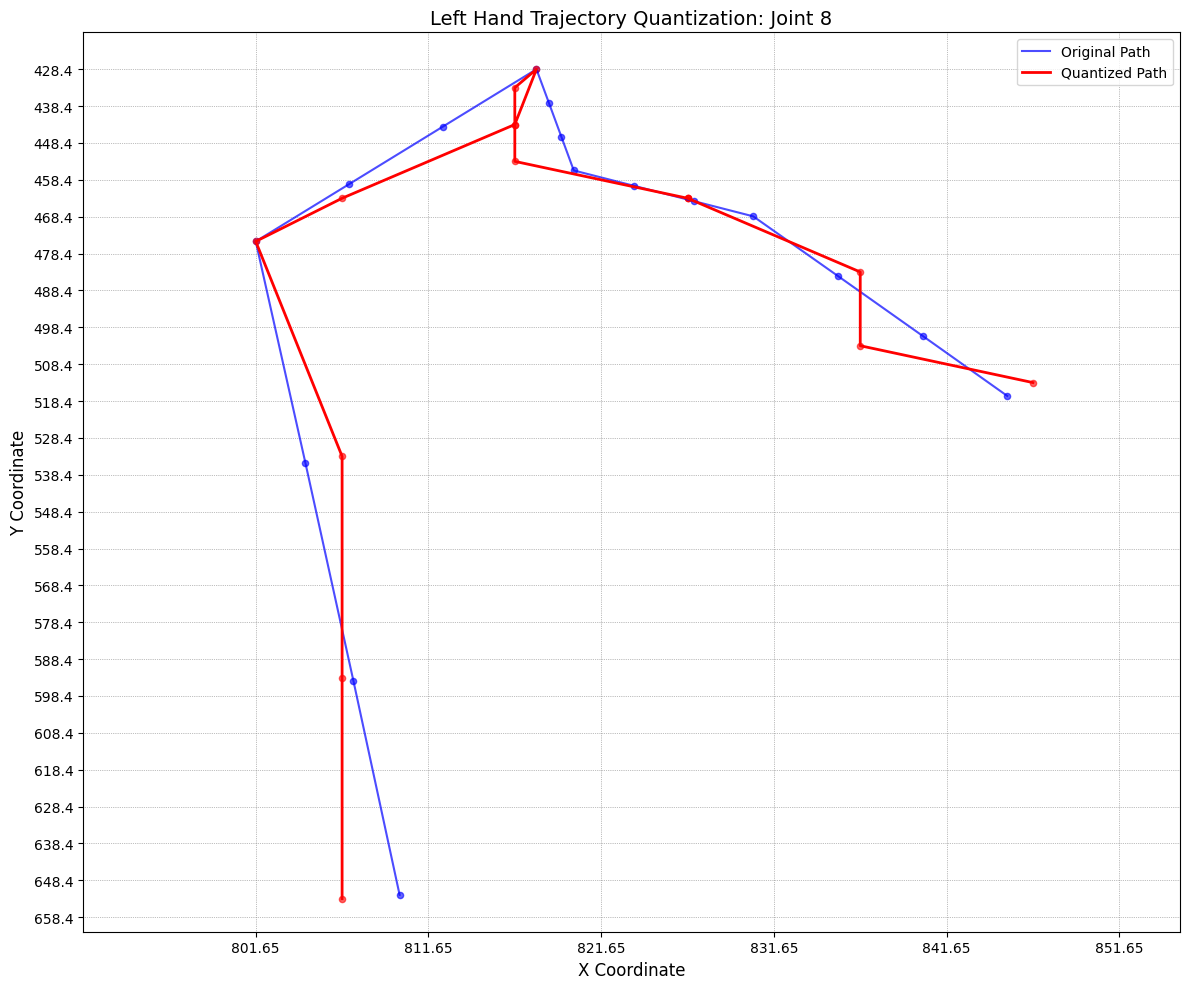

Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD1417_REAL01_U.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD1770_REAL01_F.pkl...
Visualizing quantization for right hand, joint 7


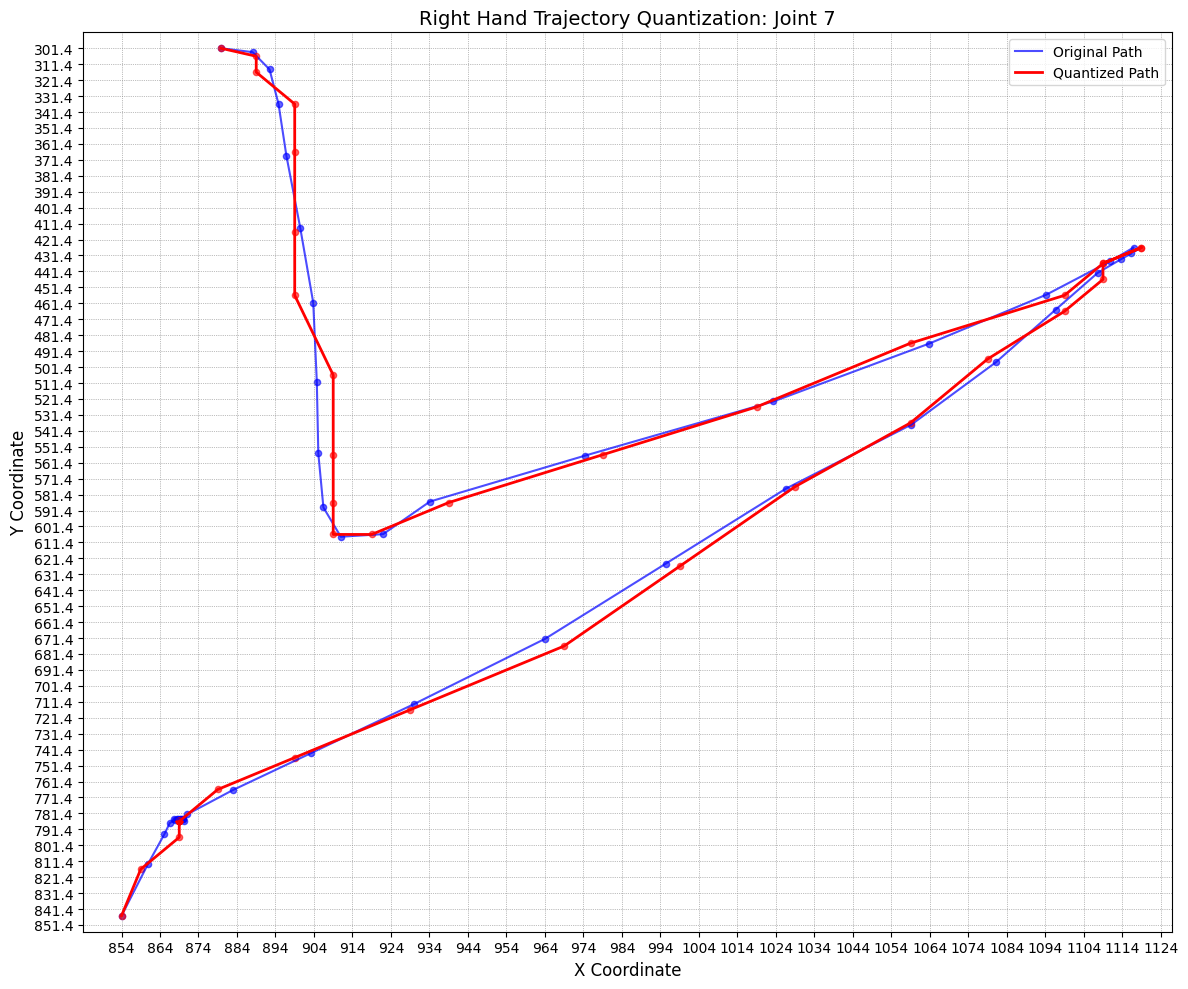

Visualizing quantization for left hand, joint 8


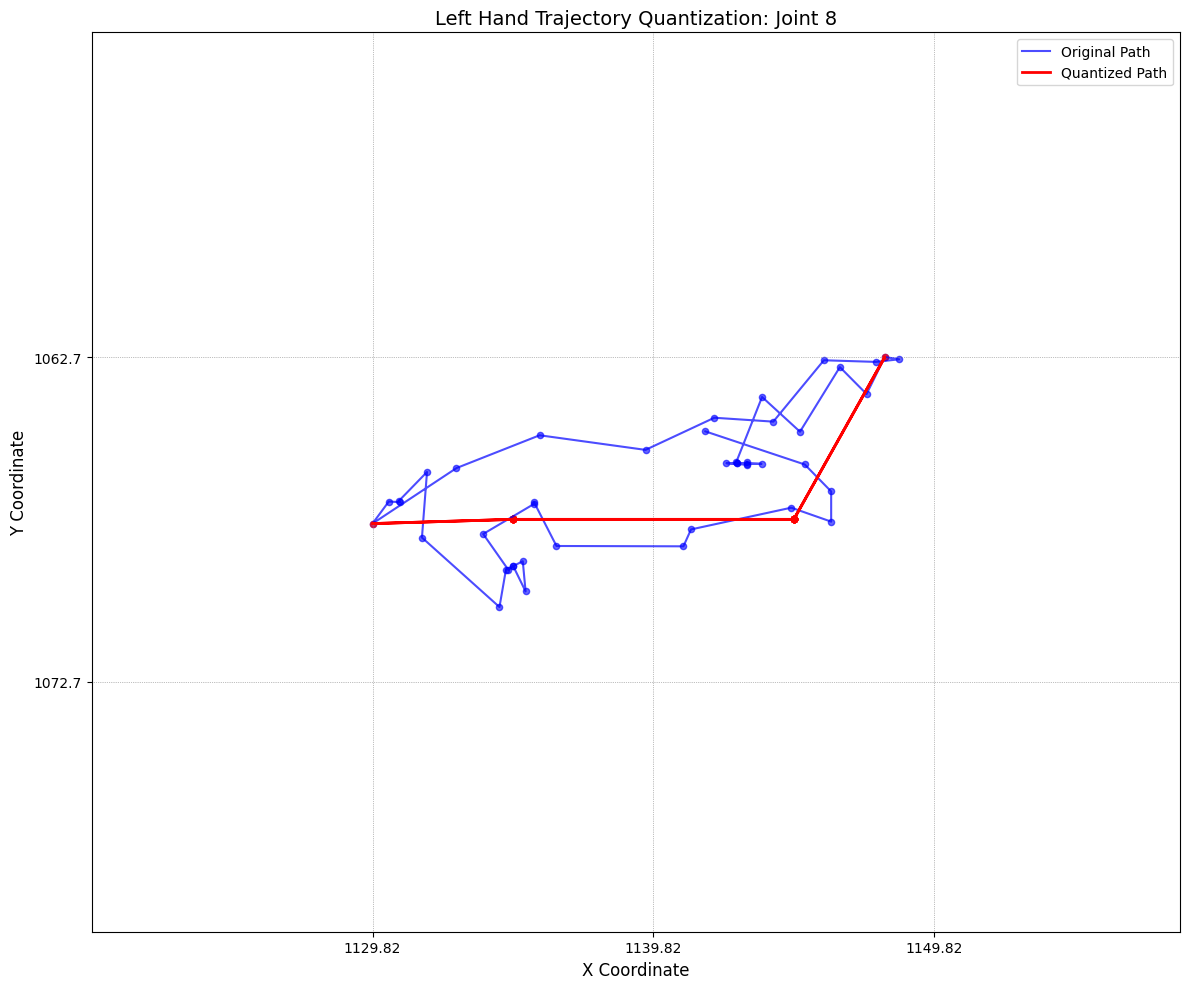

Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD1770_REAL01_F.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD2620_REAL01_L.pkl...
Visualizing quantization for right hand, joint 7


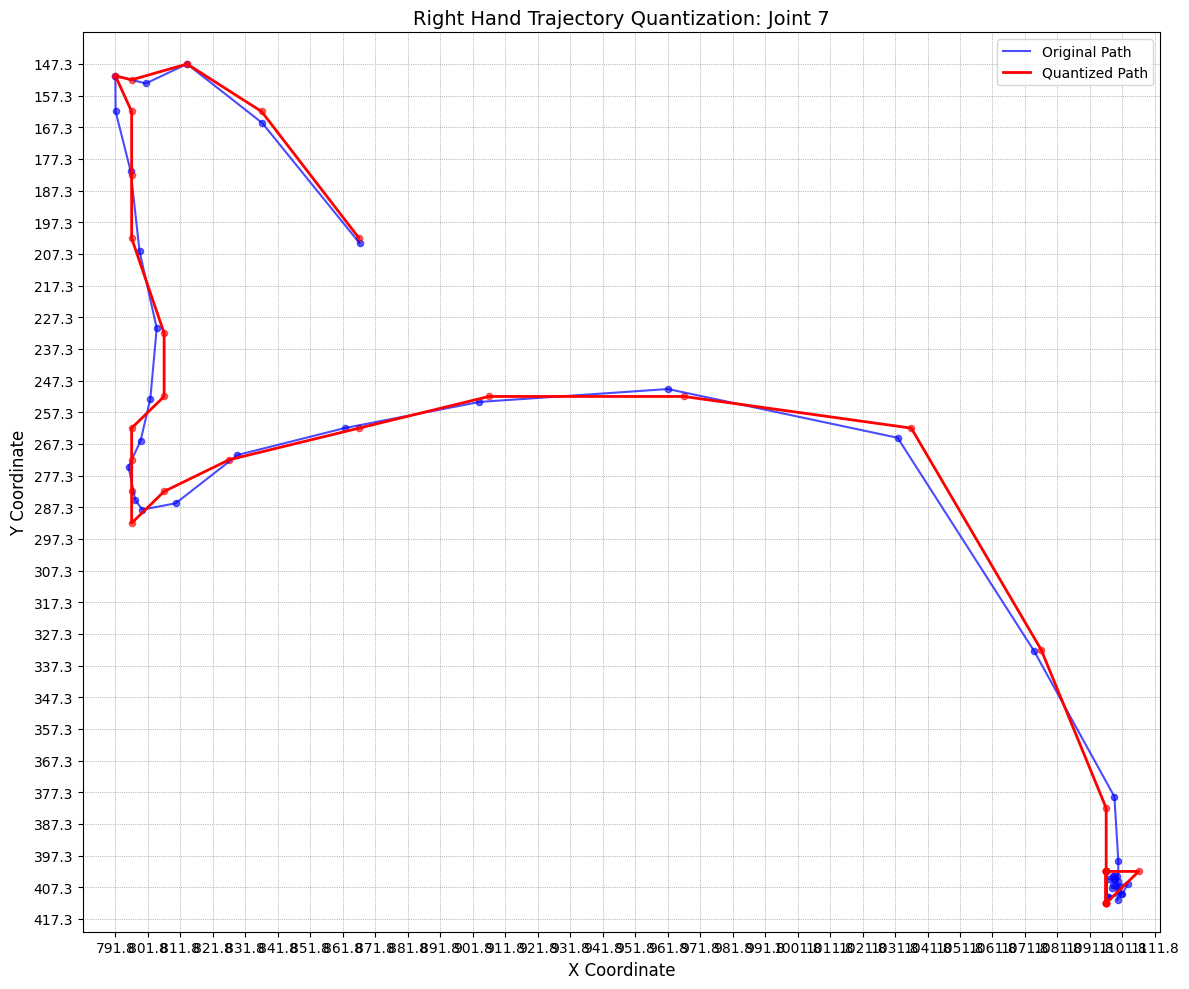

Visualizing quantization for left hand, joint 8


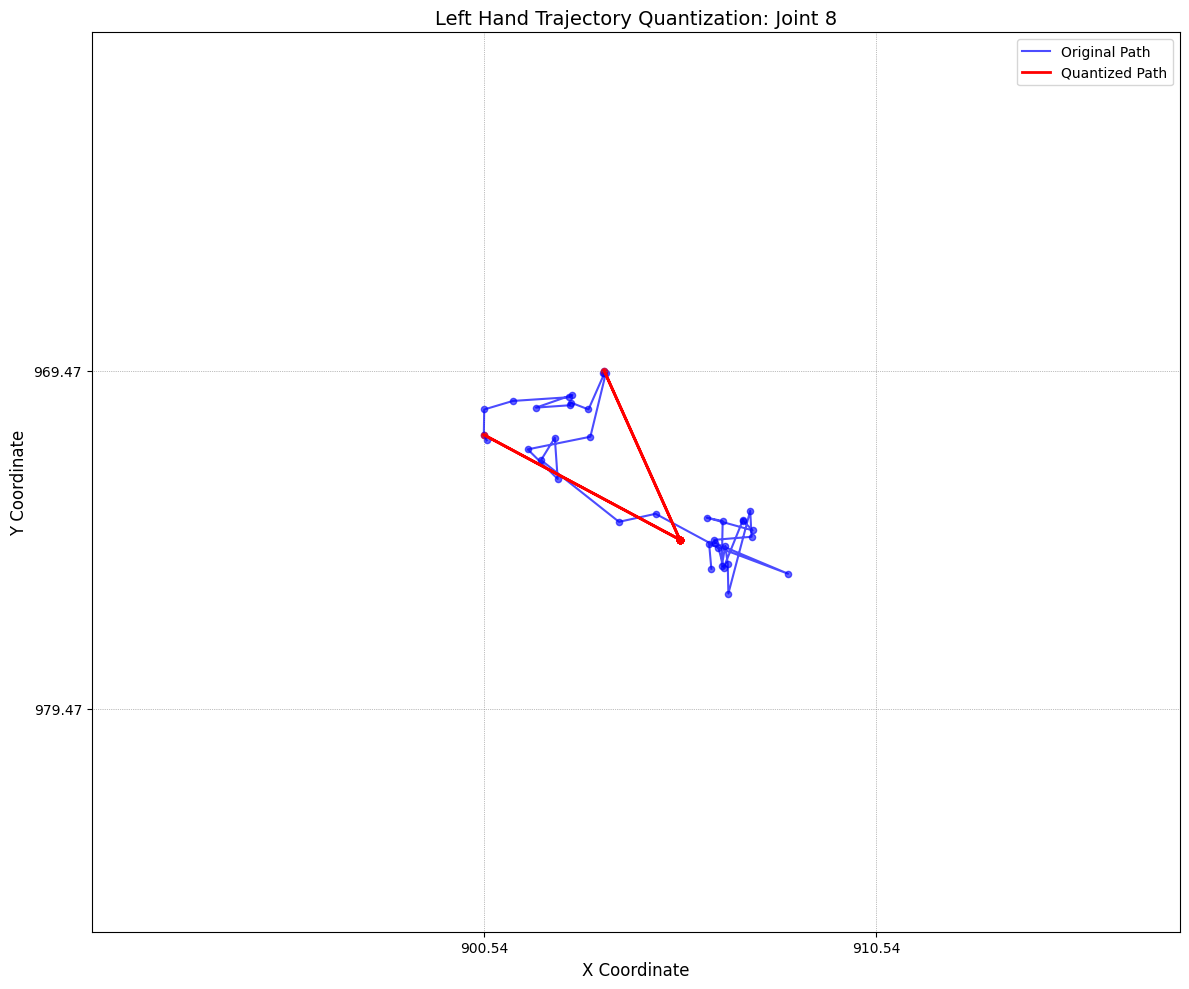

Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD2620_REAL01_L.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD2174_REAL01_F.pkl...
Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD2174_REAL01_F.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD2981_REAL01_D.pkl...
Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD2981_REAL01_D.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/NIA_SL_WORD0398_REAL01_R.pkl...
Quantized file saved to: /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/NIA_SL_WORD0398_REAL01_R.pkl
Processing /nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_thresh

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def quantize_joint_trajectory(joint_points, grid_size=10):
    """
    Quantize the trajectory of a joint on a frame-by-frame basis.
    
    Parameters:
        joint_points (np.ndarray): Array of shape (n_frames, 2) containing (x, y) coordinates.
        grid_size (float): Size of the grid cell.
        
    Returns:
        np.ndarray: Array of quantized (x, y) points with shape (n_frames, 2).
                    (Each frame gets its grid cell center.)
    """
    # Determine grid boundaries based on the joint's trajectory.
    x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
    y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()
    
    # Create grid lines.
    dis = grid_size  
    x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
    y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)
    
    quantized_points = []
    for x, y in joint_points:
        # Determine which grid cell the point falls into.
        x_cell = np.searchsorted(x_grid_lines, x) - 1
        y_cell = np.searchsorted(y_grid_lines, y) - 1
        
        if 0 <= x_cell < len(x_grid_lines) and 0 <= y_cell < len(y_grid_lines):
            # Compute the center of the grid cell.
            x_center = x_grid_lines[x_cell] + grid_size / 2
            y_center = y_grid_lines[y_cell] + grid_size / 2
        else:
            # If the point falls outside, use the original point.
            x_center, y_center = x, y
        quantized_points.append((x_center, y_center))
        
    return np.array(quantized_points)

def visualize_quantization(joint_points, quantized_points, grid_size=10, joint_index=0, hand_label=""):
    """
    Visualize the original and quantized trajectories for a given joint.
    
    Parameters:
        joint_points (np.ndarray): Original trajectory (n_frames, 2).
        quantized_points (np.ndarray): Quantized trajectory (n_frames, 2).
        grid_size (float): The grid cell size used.
        joint_index (int): Joint index (for labeling purposes).
        hand_label (str): Label indicating which hand (e.g., 'Right' or 'Left').
    """
    x_min, x_max = joint_points[:, 0].min(), joint_points[:, 0].max()
    y_min, y_max = joint_points[:, 1].min(), joint_points[:, 1].max()
    
    dis = grid_size
    x_grid_lines = np.arange(x_min - grid_size + dis, x_max + grid_size + dis, grid_size)
    y_grid_lines = np.arange(y_min - grid_size + dis, y_max + grid_size + dis, grid_size)
    
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.plot(joint_points[:, 0], joint_points[:, 1], 'b-', label='Original Path', alpha=0.7)
    ax.plot(quantized_points[:, 0], quantized_points[:, 1], 'r-', label='Quantized Path', linewidth=2)
    ax.scatter(joint_points[:, 0], joint_points[:, 1], color='blue', s=20, alpha=0.6)
    ax.scatter(quantized_points[:, 0], quantized_points[:, 1], color='red', s=20, alpha=0.6)
    
    ax.set_xticks(x_grid_lines)
    ax.set_yticks(y_grid_lines)
    ax.grid(linestyle=':', linewidth=0.5, color='gray')
    ax.set_xlim(x_min - grid_size, x_max + grid_size)
    ax.set_ylim(y_min - grid_size, y_max + grid_size)
    ax.invert_yaxis()  # Common when coordinates come from image space.
    ax.set_xlabel('X Coordinate', fontsize=12)
    ax.set_ylabel('Y Coordinate', fontsize=12)
    ax.set_title(f'{hand_label} Hand Trajectory Quantization: Joint {joint_index}', fontsize=14)
    ax.legend()
    plt.tight_layout()
    plt.show()

def process_pkl_file_quantization(input_pkl_path, output_pkl_path, grid_size=10,
                                  visualize_joint_right=None, visualize_joint_left=None):
    """
    Process one threshold-filtered PKL file and apply quantization to both the right and left hand data.
    
    The input file is assumed to contain only meaningful gesture frames.
    For each of the 21 joints in 'hand_right' and (if available) 'hand_left' (with shape: (n_frames, 21, 3)),
    the quantized (x, y) coordinate is computed for each frame.
    
    The new file will contain only two keys:
      'hand_right_quantized': a dictionary mapping joint index (0 to 20) to its quantized trajectory (n_frames, 2)
      'hand_left_quantized' : a dictionary mapping joint index (0 to 20) to its quantized trajectory (n_frames, 2)
    
    Parameters:
        input_pkl_path (str): Path to the input threshold-filtered PKL file.
        output_pkl_path (str): Path to save the quantized PKL file.
        grid_size (float): Grid cell size (e.g., 10 pixels).
        visualize_joint_right (int or None): If set (0–20), visualizes quantization for that right-hand joint.
        visualize_joint_left (int or None): If set (0–20), visualizes quantization for that left-hand joint.
    """
    with open(input_pkl_path, 'rb') as f:
        data = pickle.load(f)
    
    quantized_hand_right = {}
    quantized_hand_left = {}
    
    # Process right hand data if available.
    if 'hand_right' in data:
        hand_right = data['hand_right']  # Expected shape: (n_frames, 21, 3)
        n_frames, n_joints, _ = hand_right.shape
        for j in range(n_joints):
            joint_points = hand_right[:, j, :2]  # (n_frames, 2)
            quantized_traj = quantize_joint_trajectory(joint_points, grid_size=grid_size)
            quantized_hand_right[j] = quantized_traj
            
            if visualize_joint_right is not None and j == visualize_joint_right:
                print(f"Visualizing quantization for right hand, joint {j}")
                visualize_quantization(joint_points, quantized_traj, grid_size=grid_size,
                                       joint_index=j, hand_label="Right")
    
    # Process left hand data if available.
    if 'hand_left' in data:
        hand_left = data['hand_left']  # Expected shape: (n_frames, 21, 3)
        n_frames, n_joints, _ = hand_left.shape
        for j in range(n_joints):
            joint_points = hand_left[:, j, :2]  # (n_frames, 2)
            quantized_traj = quantize_joint_trajectory(joint_points, grid_size=grid_size)
            quantized_hand_left[j] = quantized_traj
            
            if visualize_joint_left is not None and j == visualize_joint_left:
                print(f"Visualizing quantization for left hand, joint {j}")
                visualize_quantization(joint_points, quantized_traj, grid_size=grid_size,
                                       joint_index=j, hand_label="Left")
    
    # Create a new data dictionary that contains only the quantized values.
    new_data = {}
    if quantized_hand_right:
        new_data['hand_right_quantized'] = quantized_hand_right
    if quantized_hand_left:
        new_data['hand_left_quantized'] = quantized_hand_left
    
    with open(output_pkl_path, 'wb') as f:
        pickle.dump(new_data, f)
    print(f"Quantized file saved to: {output_pkl_path}")

def process_all_pkl_files_quantization(input_dir, output_dir, grid_size=10,
                                       visualize_joint_right=None, visualize_joint_left=None,
                                       max_visualize=3):
    """
    Process all threshold-filtered PKL files in the input directory,
    quantize the hand trajectories for both right and left hands,
    and save the resulting files in the output directory.
    
    The quantized data for each hand will have the same number of frames as the input threshold file.
    The new files will contain only the quantized trajectories.
    
    Visualization is enabled only for the first 'max_visualize' files.
    
    Parameters:
        input_dir (str): Directory containing threshold-filtered PKL files.
        output_dir (str): Directory to save quantized PKL files.
        grid_size (float): Grid cell size for quantization.
        visualize_joint_right (int or None): If provided, visualizes quantization for that right-hand joint.
        visualize_joint_left (int or None): If provided, visualizes quantization for that left-hand joint.
        max_visualize (int): Maximum number of files to visualize.
    """
    os.makedirs(output_dir, exist_ok=True)
    pkl_files = [f for f in os.listdir(input_dir) if f.endswith('.pkl')]
    
    visualize_count = 0
    for pkl_file in pkl_files:
        input_path = os.path.join(input_dir, pkl_file)
        output_path = os.path.join(output_dir, pkl_file)
        print(f"Processing {input_path}...")
        
        # For only the first few files, pass the visualization parameters.
        if visualize_count < max_visualize:
            process_pkl_file_quantization(input_path, output_path, grid_size=grid_size,
                                          visualize_joint_right=visualize_joint_right,
                                          visualize_joint_left=visualize_joint_left)
            visualize_count += 1
        else:
            process_pkl_file_quantization(input_path, output_path, grid_size=grid_size,
                                          visualize_joint_right=None,
                                          visualize_joint_left=None)

# === Example usage ===

# Input directory: threshold-filtered PKL files (only meaningful gesture frames).
input_dir = r"/nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_threshold/"

# Output directory: where quantized files (only quantized values) will be saved.
output_dir = r"/nas/Chingiz/sing_language/all_json_to_pkl/01_real_word_keypoint/01/01_quantized/"

# Process all files using a grid size of 10.
# Visualization (for joint 8) will occur only for the first 3 files.
process_all_pkl_files_quantization(input_dir, output_dir, grid_size=10,
                                   visualize_joint_right=7, visualize_joint_left=8,
                                   max_visualize=3)
